## Import Library

- tensorflow 2.x (tf.keras)
- pandas
- numpy
- matplotlib

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

print(tf.__version__)

2.3.0


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [3]:
import os

working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(working_dir):
        os.mkdir(working_dir)

    os.chdir(working_dir)
    print('current dir = ', os.getcwd())

except Exception as err:

    os.chdir(original_dir)
    print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


## File Upload From Google Drive Working Directory

- titanic_train.csv
- titanic_test.csv

In [4]:
try:
  
    original_train_df = pd.read_csv('./titanic_train.csv')
    original_test_df = pd.read_csv('./titanic_test.csv')

    print("original_train_df.shape = ", original_train_df.shape, ", original_test_df.shape = ", original_test_df.shape)

except Exception as err:
  
    print(str(err))

original_train_df.shape =  (891, 12) , original_test_df.shape =  (418, 11)


In [5]:
original_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
original_test_df.head(),

(   PassengerId  Pclass  ... Cabin Embarked
 0          892       3  ...   NaN        Q
 1          893       3  ...   NaN        S
 2          894       2  ...   NaN        Q
 3          895       3  ...   NaN        S
 4          896       3  ...   NaN        S
 
 [5 rows x 11 columns],)

## CSV File Preprocessing

- Using row
> [ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- transforming non-float data to float data ('Sex' row)
- processing missing data
> - 'Age' row -> mean value
> - 'Fare' row -> median value



In [7]:
print("[original_train_df.isnull().sum()]\n", original_train_df.isnull().sum())
print("\n\n[original_test_df.isnull().sum()]\n", original_test_df.isnull().sum())

[original_train_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[original_test_df.isnull().sum()]
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_df = original_train_df.copy()[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
test_df = original_test_df.copy()[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [10]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


[test_df.isnull().sum()]
 Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [11]:
train_df["Sex"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [12]:
test_df["Sex"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [13]:
print("train_df Age mean = ", train_df['Age'].mean())
print("train_df Age median = ", train_df['Age'].median())

print("\ntest_df Age mean = ", test_df['Age'].mean())
print("test_df Age median = ", test_df['Age'].median())
print("test_df Fare mean = ", train_df['Fare'].mean())
print("test_df Fare median = ", train_df['Fare'].median())

train_df Age mean =  29.69911764705882
train_df Age median =  28.0

test_df Age mean =  30.272590361445783
test_df Age median =  27.0
test_df Fare mean =  32.2042079685746
test_df Fare median =  14.4542


In [14]:
train_df['Age'].fillna(float(train_df['Age'].mean()), inplace=True)

print("[train_df.isnull().sum()]\n", train_df.isnull().sum(), "\n")

train_df

[train_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [15]:
test_df['Age'].fillna(float(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("[test_df.isnull().sum()]\n", test_df.isnull().sum(), "\n")

test_df

[test_df.isnull().sum()]
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64 



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.50000,0,0,7.8292
1,3,1,47.00000,1,0,7.0000
2,2,0,62.00000,0,0,9.6875
3,3,0,27.00000,0,0,8.6625
4,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500
414,1,1,39.00000,0,0,108.9000
415,3,0,38.50000,0,0,7.2500
416,3,0,30.27259,0,0,8.0500


## Data Generation

- train data : 80%
- test data : 20%

- Normalization (+ test data (<- test df)): False

In [96]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, file, seperation_rate, target_position=-1):
        
        self.file = file
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        loaded_data = self.file

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [97]:
# DataGeneration class 이용하여 training data , validation data, test data 생성

train_data = np.array(train_df) # 학습 데이터프레임

data_obj = DataGeneration(train_data, seperation_rate=0.2, target_position=0)
(train_train_data, train_test_data) = data_obj.generate()

test_data = np.array(test_df) # 예측 데이터프레임

print("train_data.shape = ", train_data.shape)
print("train_train_data.shape = ", train_train_data.shape, ", train_test_data.shape = ", train_test_data.shape)
print("test_data.shape = ", test_data.shape)

[DataGeneration]  loaded_data.shape =  (891, 7)
[DataGeneration] unique number of original data =  0.0 , count =  549
[DataGeneration] unique number of original data =  1.0 , count =  342
[DataGeneration] unique number of original data =  0.0 , ratio =  61.62  %
[DataGeneration] unique number of original data =  1.0 , ratio =  38.38  %
[DataGeneration] unique number of training data =  0.0 , count =  439
[DataGeneration] unique number of training data =  1.0 , count =  274
[DataGeneration] unique number of training data =  0.0 , ratio =  61.57  %
[DataGeneration] unique number of training data =  1.0 , ratio =  38.43  %
[DataGeneration] unique number of test data =  0.0 , count =  110
[DataGeneration] unique number of test data =  1.0 , count =  68
[DataGeneration] unique number of test data =  0.0 , ratio =  61.8  %
[DataGeneration] unique number of test data =  1.0 , ratio =  38.2  %
train_data.shape =  (891, 7)
train_train_data.shape =  (713, 7) , train_test_data.shape =  (178, 7)
t

In [98]:
train_train_xdata = train_train_data[ :  , 1:]
train_train_tdata = train_train_data[ :  , [0]]

train_test_xdata = train_test_data[ :  , 1:]
train_test_tdata = train_test_data[ :  , [0]]

print("train_train_xdata = ", train_train_xdata.shape, ", train_train_tdata = ", train_train_tdata.shape)
print("train_test_xdata = ", train_test_xdata.shape, ", train_test_tdata = ", train_test_tdata.shape)

train_train_xdata =  (713, 6) , train_train_tdata =  (713, 1)
train_test_xdata =  (178, 6) , train_test_tdata =  (178, 1)


In [99]:
# 정규화(Normalization) 코드

def data_normalization(data):
  
    try:

        if data.ndim != 2:
            raise Exception("Warning: input data must be 2 dim!!")

        for i in range(len(data)):
            for j in range(len(data[i])):
                data[i, j] = (data[i, j] - np.min(data)) / (np.max(data) - np.min(data))

        return data

    except Exception as err:
        raise Exception

'''
try:
    data_normalization(train_train_xdata)
    data_normalization(train_test_xdata)
    data_normalization(test_data)

except Exception as err:
    print(str(err))
'''

'\ntry:\n    data_normalization(train_train_xdata)\n    data_normalization(train_test_xdata)\n    data_normalization(test_data)\n\nexcept Exception as err:\n    print(str(err))\n'

In [100]:
print('max(train_train_xdata) = ', np.max(train_train_xdata))
print('min(train_train_xdata) = ', np.min(train_train_xdata))

max(train_train_xdata) =  512.3292
min(train_train_xdata) =  0.0


In [101]:
print('max(train_test_xdata) = ', np.max(train_test_xdata))
print('min(train_test_xdata) = ', np.min(train_test_xdata))

max(train_test_xdata) =  227.525
min(train_test_xdata) =  0.0


In [102]:
print('max(test_data) = ', np.max(test_data))
print('min(test_data) = ', np.min(test_data))

max(test_data) =  512.3292
min(test_data) =  0.0


## Get Dataframe

- function of getting dataframe before encoding csv

In [103]:
def get_dataframe(result):

    if result.ndim == 2:
        result = result.reshape(-1) # changing data shape to 1 dim in order to get df

    df = pd.DataFrame({
        'PassengerId': original_test_df['PassengerId'],
        'Survived': result
})

    df = df.astype(int)

    return df

## ML Model 1

- validation data = True (10%)
---
- activation = sigmoid
- optimizer = SGD(Gradient Descent)
- loss = cross entropy

In [122]:
ML_1 = Sequential()

ML_1.add(Dense(train_train_tdata.shape[1], 
               input_shape=(train_train_xdata.shape[1], ), activation='sigmoid'))

In [123]:
ML_1.compile(optimizer=SGD(lr=1e-5),
               loss='binary_crossentropy', metrics=['accuracy'])

ML_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [124]:
start_time = datetime.now()

hist = ML_1.fit(train_train_xdata, train_train_tdata, epochs=1000, validation_split=0.1, verbose=2)

end_time = datetime.now()

print("\nElasped time : ", end_time - start_time)

Epoch 1/1000
21/21 - 0s - loss: 23.6182 - accuracy: 0.6193 - val_loss: 18.9245 - val_accuracy: 0.5833
Epoch 2/1000
21/21 - 0s - loss: 23.5097 - accuracy: 0.6193 - val_loss: 18.8292 - val_accuracy: 0.5833
Epoch 3/1000
21/21 - 0s - loss: 23.3856 - accuracy: 0.6193 - val_loss: 18.7418 - val_accuracy: 0.5833
Epoch 4/1000
21/21 - 0s - loss: 23.2719 - accuracy: 0.6193 - val_loss: 18.6546 - val_accuracy: 0.5833
Epoch 5/1000
21/21 - 0s - loss: 23.1588 - accuracy: 0.6193 - val_loss: 18.5716 - val_accuracy: 0.5833
Epoch 6/1000
21/21 - 0s - loss: 23.0503 - accuracy: 0.6193 - val_loss: 18.4886 - val_accuracy: 0.5833
Epoch 7/1000
21/21 - 0s - loss: 22.9415 - accuracy: 0.6193 - val_loss: 18.3946 - val_accuracy: 0.5833
Epoch 8/1000
21/21 - 0s - loss: 22.8185 - accuracy: 0.6193 - val_loss: 18.3116 - val_accuracy: 0.5833
Epoch 9/1000
21/21 - 0s - loss: 22.7099 - accuracy: 0.6193 - val_loss: 18.2286 - val_accuracy: 0.5833
Epoch 10/1000
21/21 - 0s - loss: 22.6014 - accuracy: 0.6193 - val_loss: 18.1390 - 

In [125]:
print('type(hist) = ', type(hist))
print('type(hist.history) = ', type(hist.history))
print()

hist.history.keys()

type(hist) =  <class 'tensorflow.python.keras.callbacks.History'>
type(hist.history) =  <class 'dict'>



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [126]:
ML_1.evaluate(train_test_xdata, train_test_tdata)

6/6 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.6180


[0.732194185256958, 0.617977499961853]

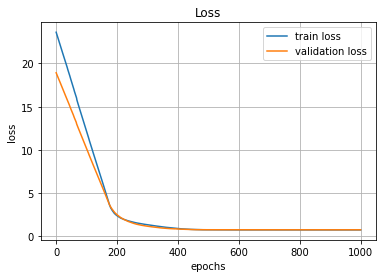

In [127]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

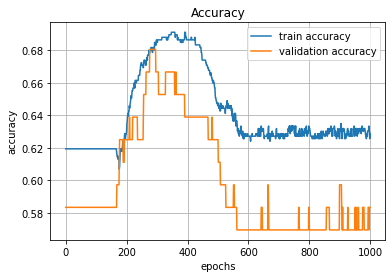

In [128]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [129]:
real_predict_list = ML_1.predict(train_train_xdata)

print('type(real_predict_list) = ', type(real_predict_list))
print('real_predict_list sample = ', real_predict_list[:10])
print()

logical_predict_list = (real_predict_list > 0.5)

print('type(logical_predict_list) = ', type(logical_predict_list))
print('logical_predict_list sample = ', logical_predict_list[:10])
print()

logical_predict_list = logical_predict_list.flatten().astype('float32')

print('type(logical_predict_list) = ', type(logical_predict_list))
print("logical_predict_list sample = ", logical_predict_list[:10])
print()

label_list = train_train_tdata.flatten()

print('logical_predict_list.shape = ', logical_predict_list.shape)
print('label_list.shape = ', label_list.shape)

index_label_prediction_list = [[idx, label_list[idx], prediction] for idx, prediction in enumerate(logical_predict_list) if label_list[idx] != prediction]

print('\n', index_label_prediction_list)

train_accuracy = 1 - (len(index_label_prediction_list) / len(label_list))

print('\ntrain accuracy = ', train_accuracy)

type(real_predict_list) =  <class 'numpy.ndarray'>
real_predict_list sample =  [[0.33394796]
 [0.65176886]
 [0.21173556]
 [0.2693218 ]
 [0.35650113]
 [0.4082695 ]
 [0.14078912]
 [0.5376621 ]
 [0.74977744]
 [0.14322738]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [[False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]

logical_predict_list.shape =  (713,)
label_list.shape =  (713,)

 [[0, 1.0, 0.0], [2, 1.0, 0.0], [3, 1.0, 0.0], [6, 1.0, 0.0], [7, 0.0, 1.0], [8, 0.0, 1.0], [9, 1.0, 0.0], [10, 1.0, 0.0], [11, 0.0, 1.0], [12, 1.0, 0.0], [15, 1.0, 0.0], [18, 1.0, 0.0], [20, 1.0, 0.0], [22, 0.0, 1.0], [23, 0.0, 1.0], [24, 1.0, 0.0], [27, 0.0, 1.0], [29, 0.0, 1.0], [30, 1.0, 0.0], [32, 1.0, 0.0], [43, 1.0, 0.0], [46, 1.0, 0.0], [48, 0.0, 1.0], [51, 1.0, 0.0], [52, 1.0, 0.0], [55, 1.0, 0.0], [61, 0.0

In [130]:
result = ML_1.predict(test_data)

ML_1_submission = get_dataframe(result)

ML_1_submission.to_csv('ML_1_submission(tf2).csv', index=False)

## ML Model 2

- validation data = True (10%)
---
- activation = sigmoid
- optimizer = Adam
- loss = cross entropy

In [60]:
ML_2 = Sequential()

ML_2.add(Dense(train_train_tdata.shape[1],
                input_shape=(train_train_xdata.shape[1], ), activation='sigmoid'))

In [61]:
ML_2.compile(optimizer=Adam(lr=1e-2),
               loss='binary_crossentropy', metrics=['accuracy'])

ML_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [62]:
start_time = datetime.now()

hist = ML_2.fit(train_train_xdata, train_train_tdata, epochs=500, validation_split=0.1, verbose=2)

end_time = datetime.now()

print("\nElasped time : ", end_time - start_time)

Epoch 1/500
21/21 - 0s - loss: 0.6799 - accuracy: 0.6459 - val_loss: 0.6606 - val_accuracy: 0.6528
Epoch 2/500
21/21 - 0s - loss: 0.6679 - accuracy: 0.6209 - val_loss: 0.6534 - val_accuracy: 0.6389
Epoch 3/500
21/21 - 0s - loss: 0.6607 - accuracy: 0.6209 - val_loss: 0.6495 - val_accuracy: 0.6389
Epoch 4/500
21/21 - 0s - loss: 0.6572 - accuracy: 0.6209 - val_loss: 0.6460 - val_accuracy: 0.6389
Epoch 5/500
21/21 - 0s - loss: 0.6551 - accuracy: 0.6209 - val_loss: 0.6426 - val_accuracy: 0.6389
Epoch 6/500
21/21 - 0s - loss: 0.6539 - accuracy: 0.6209 - val_loss: 0.6367 - val_accuracy: 0.6528
Epoch 7/500
21/21 - 0s - loss: 0.6525 - accuracy: 0.6209 - val_loss: 0.6332 - val_accuracy: 0.6528
Epoch 8/500
21/21 - 0s - loss: 0.6516 - accuracy: 0.6256 - val_loss: 0.6289 - val_accuracy: 0.6528
Epoch 9/500
21/21 - 0s - loss: 0.6504 - accuracy: 0.6271 - val_loss: 0.6259 - val_accuracy: 0.6667
Epoch 10/500
21/21 - 0s - loss: 0.6496 - accuracy: 0.6287 - val_loss: 0.6223 - val_accuracy: 0.6806
Epoch 11/

In [63]:
print('type(hist) = ', type(hist))
print('type(hist.history) = ', type(hist.history))
print()

hist.history.keys()

type(hist) =  <class 'tensorflow.python.keras.callbacks.History'>
type(hist.history) =  <class 'dict'>



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [64]:
ML_2.evaluate(train_test_xdata, train_test_tdata)

6/6 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.6629


[0.6162680983543396, 0.6629213690757751]

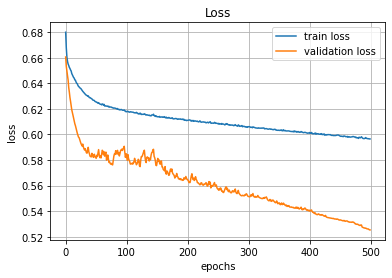

In [65]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

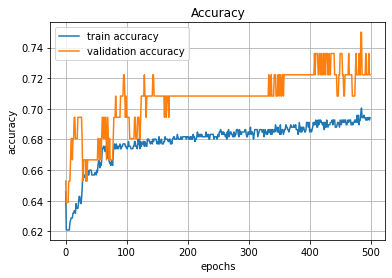

In [66]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [67]:
real_predict_list = ML_2.predict(train_train_xdata)

print('type(real_predict_list) = ', type(real_predict_list))
print('real_predict_list sample = ', real_predict_list[:10])
print()

logical_predict_list = (real_predict_list > 0.5)

print('type(logical_predict_list) = ', type(logical_predict_list))
print('logical_predict_list sample = ', logical_predict_list[:10])
print()

logical_predict_list = logical_predict_list.flatten().astype('float32')

print('type(logical_predict_list) = ', type(logical_predict_list))
print("logical_predict_list sample = ", logical_predict_list[:10])
print()

label_list = train_train_tdata.flatten()

print('logical_predict_list.shape = ', logical_predict_list.shape)
print('label_list.shape = ', label_list.shape)

index_label_prediction_list = [[idx, label_list[idx], prediction] for idx, prediction in enumerate(logical_predict_list) if label_list[idx] != prediction]

print('\n', index_label_prediction_list)

train_accuracy = 1 - (len(index_label_prediction_list) / len(label_list))

print('\ntrain accuracy = ', train_accuracy)

type(real_predict_list) =  <class 'numpy.ndarray'>
real_predict_list sample =  [[0.48019648]
 [0.28907922]
 [0.40918386]
 [0.25689366]
 [0.29305544]
 [0.2959467 ]
 [0.30800703]
 [0.3171506 ]
 [0.4113588 ]
 [0.57070565]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

logical_predict_list.shape =  (713,)
label_list.shape =  (713,)

 [[0, 1.0, 0.0], [1, 1.0, 0.0], [2, 1.0, 0.0], [5, 1.0, 0.0], [8, 1.0, 0.0], [10, 1.0, 0.0], [11, 1.0, 0.0], [12, 1.0, 0.0], [15, 1.0, 0.0], [16, 1.0, 0.0], [17, 1.0, 0.0], [19, 1.0, 0.0], [21, 1.0, 0.0], [22, 1.0, 0.0], [24, 1.0, 0.0], [29, 1.0, 0.0], [38, 0.0, 1.0], [43, 1.0, 0.0], [45, 1.0, 0.0], [47, 1.0, 0.0], [50, 0.0, 1.0], [59, 1.0, 0.0], [66, 1.0, 0.0], [68, 1.0, 0.0], [73, 1.0, 0.0], [76, 1.0, 0.0], [80, 1

In [68]:
result = ML_2.predict(test_data)

ML_2_submission = get_dataframe(result)

ML_2_submission.to_csv('ML_2_submission(tf2).csv', index=False)

## DL Model 1

- validation data = True (10%)
---
- hidden layer = 1
---
- activation = sigmoid
- optimizer = Adam
- loss = cross entropy

In [87]:
DL_1 = Sequential()

hidden_nodes = 20

DL_1.add(Dense(hidden_nodes,
                input_shape=(train_train_xdata.shape[1], ), activation='sigmoid'))

DL_1.add(Dense(train_train_tdata.shape[1],
                input_shape=(hidden_nodes, ), activation='sigmoid'))

In [88]:
DL_1.compile(optimizer=Adam(lr=1e-3),
               loss='binary_crossentropy', metrics=['accuracy'])

DL_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [89]:
start_time = datetime.now()

hist = DL_1.fit(train_train_xdata, train_train_tdata, epochs=500, validation_split=0.1, verbose=2)

end_time = datetime.now()

print("\nElasped time : ", end_time - start_time)

Epoch 1/500
21/21 - 0s - loss: 0.7543 - accuracy: 0.3807 - val_loss: 0.7283 - val_accuracy: 0.3750
Epoch 2/500
21/21 - 0s - loss: 0.7163 - accuracy: 0.3807 - val_loss: 0.6985 - val_accuracy: 0.3750
Epoch 3/500
21/21 - 0s - loss: 0.6901 - accuracy: 0.5476 - val_loss: 0.6785 - val_accuracy: 0.6250
Epoch 4/500
21/21 - 0s - loss: 0.6773 - accuracy: 0.6193 - val_loss: 0.6700 - val_accuracy: 0.6250
Epoch 5/500
21/21 - 0s - loss: 0.6692 - accuracy: 0.6193 - val_loss: 0.6633 - val_accuracy: 0.6250
Epoch 6/500
21/21 - 0s - loss: 0.6656 - accuracy: 0.6193 - val_loss: 0.6595 - val_accuracy: 0.6250
Epoch 7/500
21/21 - 0s - loss: 0.6636 - accuracy: 0.6193 - val_loss: 0.6579 - val_accuracy: 0.6250
Epoch 8/500
21/21 - 0s - loss: 0.6626 - accuracy: 0.6193 - val_loss: 0.6569 - val_accuracy: 0.6250
Epoch 9/500
21/21 - 0s - loss: 0.6630 - accuracy: 0.6193 - val_loss: 0.6562 - val_accuracy: 0.6250
Epoch 10/500
21/21 - 0s - loss: 0.6625 - accuracy: 0.6193 - val_loss: 0.6553 - val_accuracy: 0.6250
Epoch 11/

In [90]:
print('type(hist) = ', type(hist))
print('type(hist.history) = ', type(hist.history))
print()

hist.history.keys()

type(hist) =  <class 'tensorflow.python.keras.callbacks.History'>
type(hist.history) =  <class 'dict'>



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [91]:
DL_1.evaluate(train_test_xdata, train_test_tdata)

6/6 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6629


[0.6282272338867188, 0.6629213690757751]

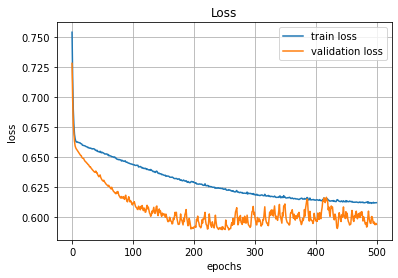

In [92]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

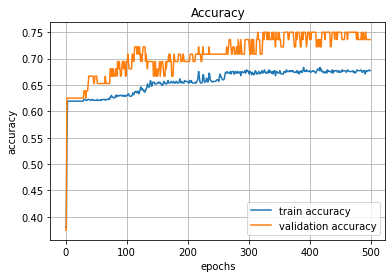

In [93]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [94]:
real_predict_list = DL_1.predict(train_train_xdata)

print('type(real_predict_list) = ', type(real_predict_list))
print('real_predict_list sample = ', real_predict_list[:10])
print()

logical_predict_list = (real_predict_list > 0.5)

print('type(logical_predict_list) = ', type(logical_predict_list))
print('logical_predict_list sample = ', logical_predict_list[:10])
print()

logical_predict_list = logical_predict_list.flatten().astype('float32')

print('type(logical_predict_list) = ', type(logical_predict_list))
print("logical_predict_list sample = ", logical_predict_list[:10])
print()

label_list = train_train_tdata.flatten()

print('logical_predict_list.shape = ', logical_predict_list.shape)
print('label_list.shape = ', label_list.shape)

index_label_prediction_list = [[idx, label_list[idx], prediction] for idx, prediction in enumerate(logical_predict_list) if label_list[idx] != prediction]

print('\n', index_label_prediction_list)

train_accuracy = 1 - (len(index_label_prediction_list) / len(label_list))

print('\ntrain accuracy = ', train_accuracy)

type(real_predict_list) =  <class 'numpy.ndarray'>
real_predict_list sample =  [[0.44133162]
 [0.28390497]
 [0.36445946]
 [0.24708086]
 [0.28127763]
 [0.28158015]
 [0.28905877]
 [0.29544854]
 [0.36889753]
 [0.5779985 ]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

logical_predict_list.shape =  (713,)
label_list.shape =  (713,)

 [[0, 1.0, 0.0], [1, 1.0, 0.0], [2, 1.0, 0.0], [5, 1.0, 0.0], [8, 1.0, 0.0], [10, 1.0, 0.0], [11, 1.0, 0.0], [12, 1.0, 0.0], [15, 1.0, 0.0], [16, 1.0, 0.0], [17, 1.0, 0.0], [19, 1.0, 0.0], [21, 1.0, 0.0], [22, 1.0, 0.0], [24, 1.0, 0.0], [29, 1.0, 0.0], [38, 0.0, 1.0], [43, 1.0, 0.0], [45, 1.0, 0.0], [47, 1.0, 0.0], [50, 0.0, 1.0], [59, 1.0, 0.0], [66, 1.0, 0.0], [68, 1.0, 0.0], [73, 1.0, 0.0], [76, 1.0, 0.0], [80, 1

In [95]:
result = DL_1.predict(test_data)

DL_1_submission = get_dataframe(result)

DL_1_submission.to_csv('DL_1_submission(tf2).csv', index=False)